# Ford_Go_Bike Trip Duration vs User Type and Week Days
## by Uzedu Omoyemen Frances

## Investigation Overview


> In this dataset investigation, I looked at the Bike Trip duration how it cuts across the user types and also against different days of the week. The main variables of interest were the Trip duration, user type, and days of the week the bike was rented.  


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This dataset contains about 184,000 entries and includes variables such as Bike trip duration, User type, gender, start time, end time, End Station Latitude, End Station Longitude, Start Station Latitude, Start Station Longitude and after some cleaning process was carried out 174,000 rows were left.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('fordgobike_data.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1, inplace=True)
df.dropna(inplace=True)

In [4]:
df['age']= 2019 - df['member_birth_year']
bins=[18,30,60,140]
labels=['Youths (18-30)', 'Middle-aged (31-60)', 'Oldies (60+)']
df['age_group']=pd.cut(df['age'], bins=bins, labels=labels)


df['start_time'] = pd.to_datetime(df['start_time'])
df['start_day']=df['start_time'].dt.day_name()

In [5]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

week_class=pd.api.types.CategoricalDtype(ordered=True, categories=order)
df['start_day']=df['start_day'].astype(week_class)

In [6]:
df['duration_min']=df['duration_sec'] / 60

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Bike Trips Duration in seconds

Time spent on a trip for most rides was about 10 minutes (600 seconds).

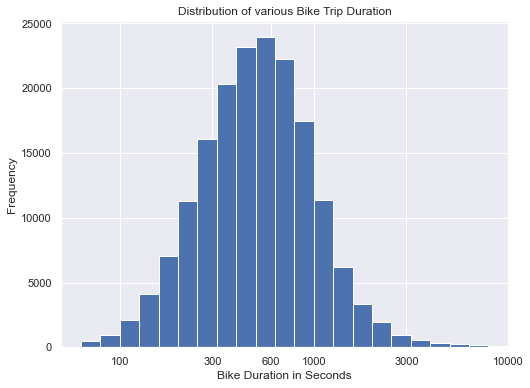

In [19]:
logsize=0.1
bins = 10**np.arange(0, 5+logsize, logsize)
sb.set_theme(style="darkgrid")
plt.figure(figsize=[8,6])
ticks=[100,300,600,1000,3000,10000]
labels=['{}'. format (v) for v in ticks]
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlim([50,10000])
plt.xticks(ticks, labels)
plt.xlabel('Bike Duration in Seconds')
plt.ylabel('Frequency')
plt.title('Distribution of various Bike Trip Duration');

## Distribution of User Type
 We have more subscribers than customers. The customers are temporary or one-time users while subscribers are members or frequent users.

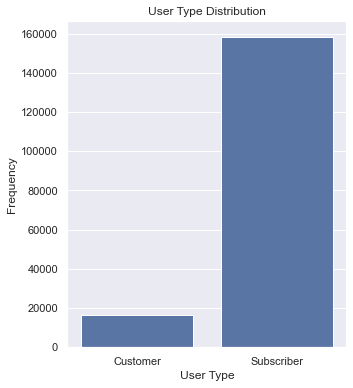

In [18]:
plt.figure(figsize=(5,6))
sb.set_theme(style="darkgrid")
base=sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base)
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.title('User Type Distribution');

## Distribution of Days bikes were rented
Most trips were taken during the week especially Thursdays and Tuesdays unlike weekend.

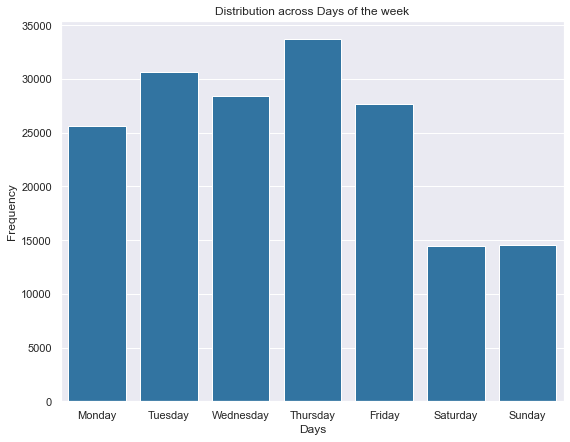

In [17]:
plt.figure(figsize=(9,7))
sb.set_theme(style="darkgrid")
sb.countplot(data=df, x='start_day', color=base)
plt.title('Distribution across Days of the week')
plt.xlabel('Days')
plt.ylabel('Frequency');

## Distribution of Bike trip vs User Type
Although we have more subscribers, customers on a average tend to spend more time on trips with an average of about 24 minutes.

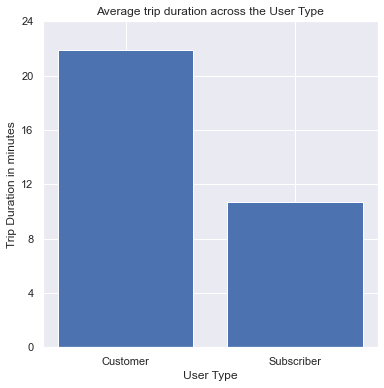

In [22]:
customer_mean=df.query('user_type == "Customer"').duration_min.mean()
subscriber_mean=df.query('user_type == "Subscriber"').duration_min.mean()

plt.figure(figsize=(6,6))
plt.bar(['Customer', 'Subscriber'], [customer_mean, subscriber_mean])
sb.set_theme(style="darkgrid")
plt.title('Average trip duration across the User Type')
plt.yticks([0,4,8,12,16,20,24], [0,4,8,12,16,20,24])
#plt.ylim(0,25)
plt.xlabel('User Type')
plt.ylabel('Trip Duration in minutes');

## Distribution of Bike trips vs Days of the week
More time was spent on trips during the weekends unlike the weekedays

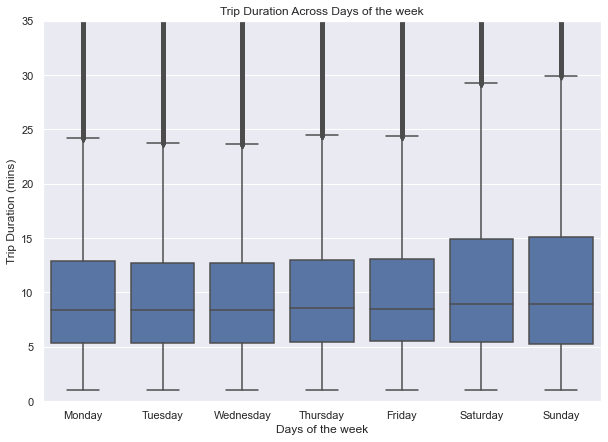

In [30]:
plt.figure(figsize=(10,7))
sb.set_theme(style="darkgrid")
sb.boxplot(data=df, x='start_day', y='duration_min', color=base)
plt.ylim(0,35)
plt.title('Trip Duration Across Days of the week')
plt.xlabel('Days of the week')
plt.ylabel('Trip Duration (mins)');

## Distribution of Bike trip vs User type vs Days of the week
Customers generally travel long distance especially during weekends, whereas the subscribers take short journeys regardless of what day of the week it is.

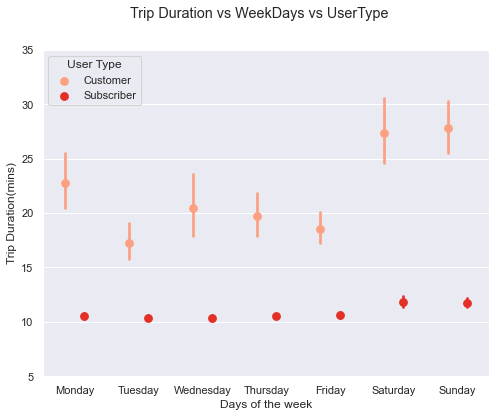

In [27]:
plt.figure(figsize=(8,6))
sb.set_theme(style="darkgrid")
sb.pointplot(data = df, x = 'start_day', y = 'duration_min', hue = 'user_type', palette = 'Reds', dodge = 0.3, linestyles = "")
plt.ylabel('Trip Duration(mins)')
plt.xlabel('Days of the week')
plt.ylim(5,35)
plt.suptitle('Trip Duration vs WeekDays vs UserType')
plt.legend(title='User Type');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [28]:
# Use this command if you are running this file in local
!jupyter nbconvert Ford_Go_Bike_Presentation_Slide.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Ford_Go_Bike_Presentation_Slide.ipynb to slides
[NbConvertApp] Writing 708146 bytes to Ford_Go_Bike_Presentation_Slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nb